In [1]:
import pandas as pd

# Load the dataset
try:
    df = pd.read_csv("owid-covid-data.csv")
    print("Data loaded successfully!")
except FileNotFoundError:
    print("File not found. Make sure 'owid-covid-data.csv' is in your working directory.")


Data loaded successfully!


In [2]:
# 1. Import pandas
import pandas as pd

# 2. Load the dataset
try:
    df = pd.read_csv("owid-covid-data.csv")
    print("Data loaded successfully!\n")
except FileNotFoundError:
    print("File not found. Please upload 'owid-covid-data.csv' to your notebook environment.")

# 3. Check column names
print("Columns in the dataset:")
print(df.columns.tolist())  # Converts Index to a list for easier reading

# 4. Preview the first 5 rows
print("\n Preview of data (first 5 rows):")
print(df.head())

# 5. Identify missing values
print("\n Missing values per column:")
print(df.isnull().sum())


Data loaded successfully!

Columns in the dataset:
['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundr

In [3]:
import pandas as pd

# 1. Load the dataset (if not already loaded)
df = pd.read_csv("owid-covid-data.csv")

# 2. Filter countries of interest (e.g., Kenya, USA, India)
countries = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries)]

# 3. Drop rows with missing critical values (e.g., 'date', 'total_cases', 'new_cases')
df_filtered = df_filtered.dropna(subset=['date', 'total_cases', 'new_cases'])

# 4. Convert 'date' column to datetime format
df_filtered['date'] = pd.to_datetime(df_filtered['date'], errors='coerce')

# Drop rows where 'date' couldn't be converted
df_filtered = df_filtered.dropna(subset=['date'])

# 5. Fill or interpolate missing numeric values
# Option A: Fill missing numeric values with 0 (if appropriate)
# df_filtered = df_filtered.fillna(0)

# Option B (Recommended): Use interpolation for numeric continuity
df_filtered = df_filtered.sort_values(['location', 'date'])  # Sort before interpolation
df_filtered[['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations']] = (
    df_filtered[['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations']].interpolate()
)

# Optional: Reset index
df_filtered.reset_index(drop=True, inplace=True)

# Preview cleaned data
print("Cleaned data preview:")
print(df_filtered.head())


Cleaned data preview:
  iso_code continent location       date  total_cases  new_cases  \
0      IND      Asia    India 2020-01-05          0.0        0.0   
1      IND      Asia    India 2020-01-06          0.0        0.0   
2      IND      Asia    India 2020-01-07          0.0        0.0   
3      IND      Asia    India 2020-01-08          0.0        0.0   
4      IND      Asia    India 2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0          20.6                   5

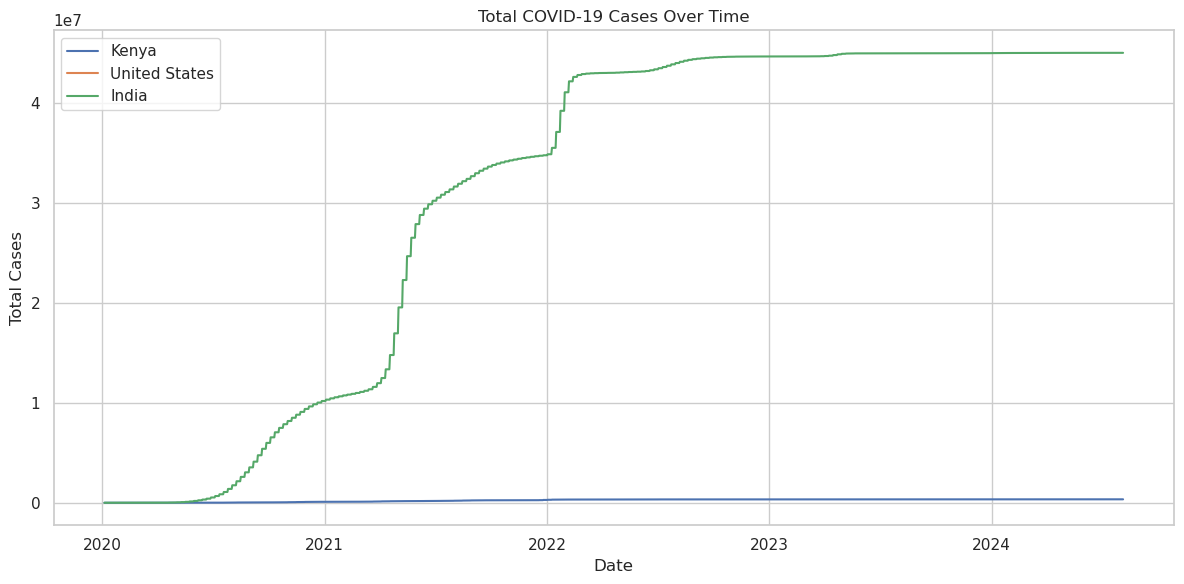

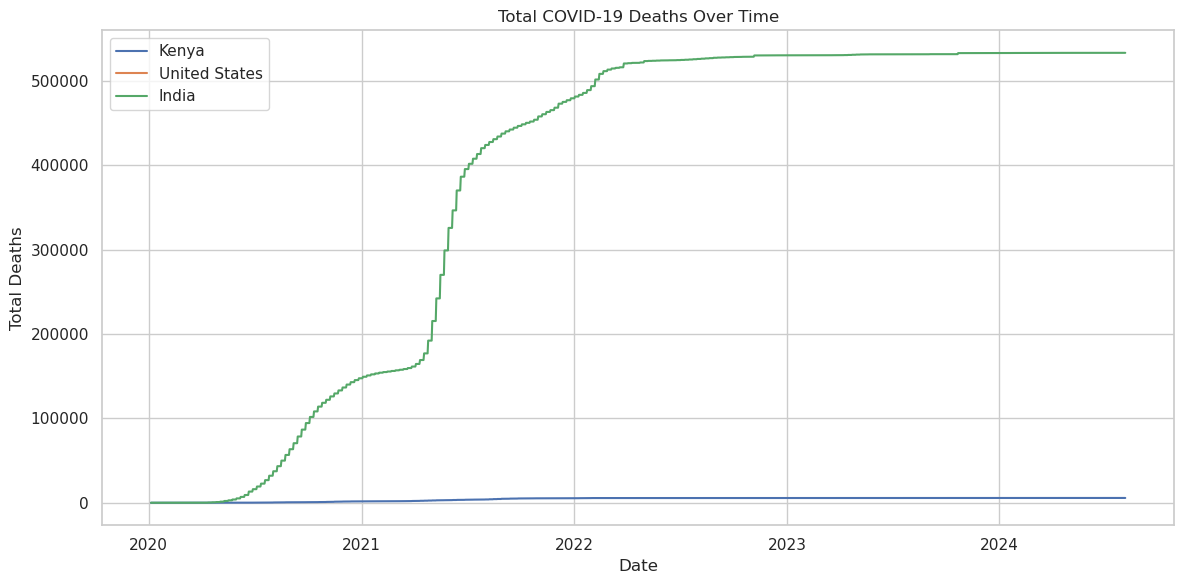

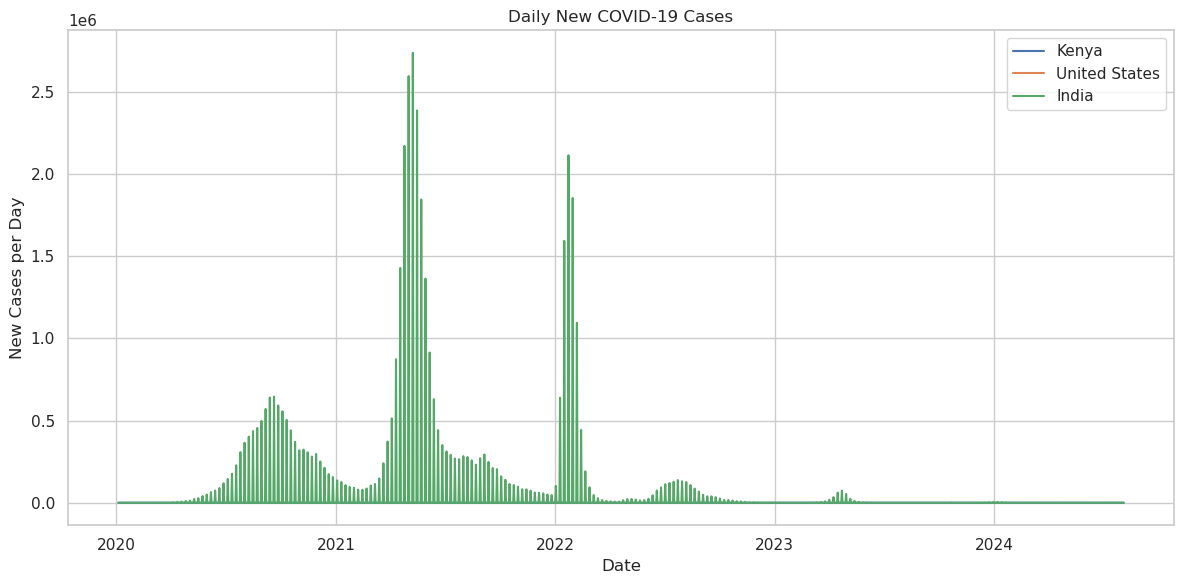

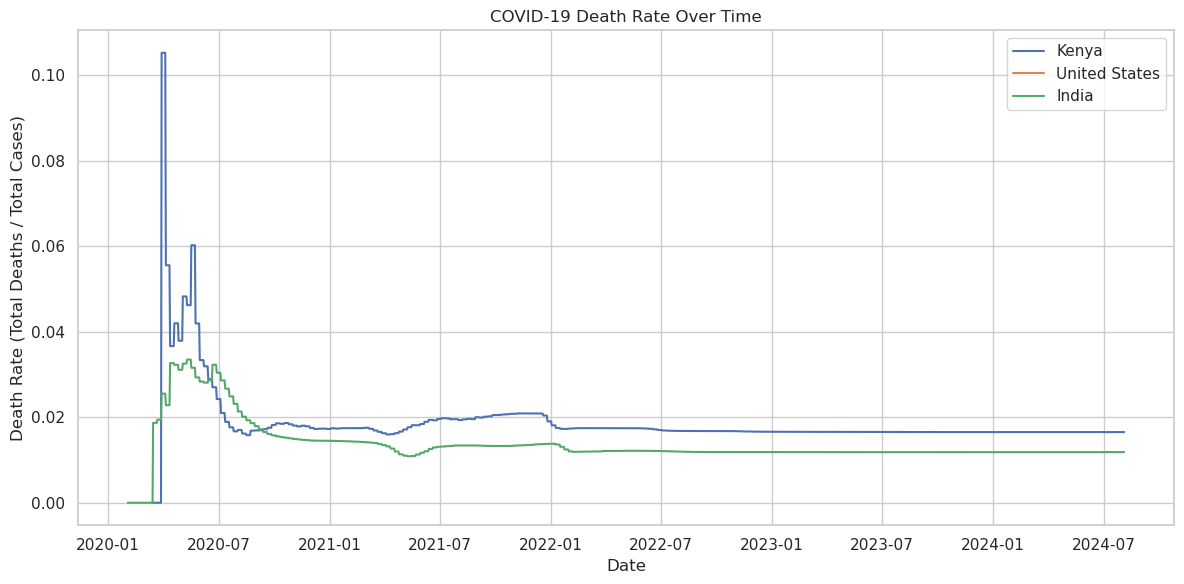

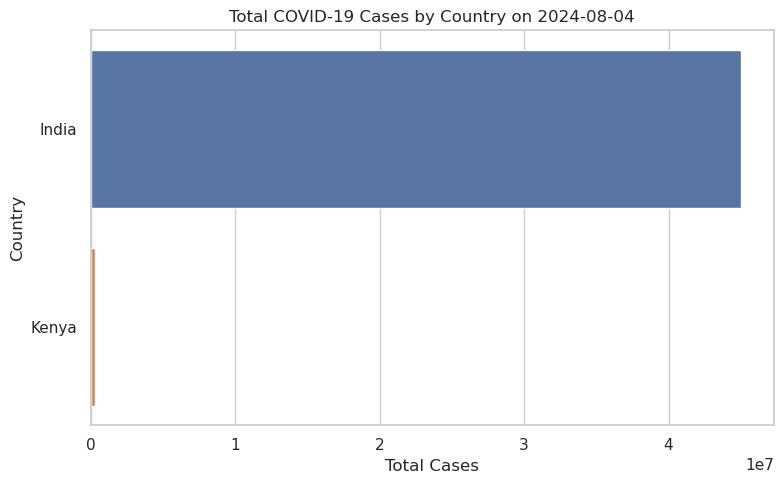

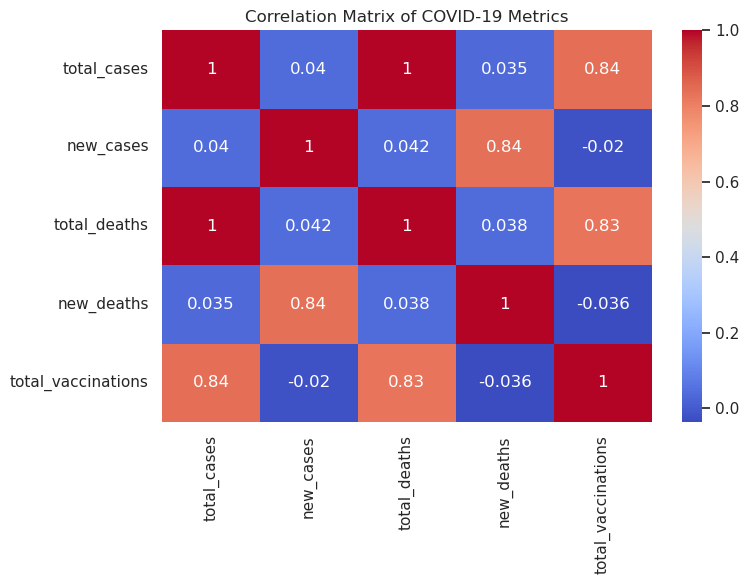

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn theme for prettier charts
sns.set(style="whitegrid")

# Make sure date is sorted
df_filtered = df_filtered.sort_values(by=['location', 'date'])

# 1. Plot total cases over time
plt.figure(figsize=(12, 6))
for country in countries:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.tight_layout()
plt.show()

# 2. Plot total deaths over time
plt.figure(figsize=(12, 6))
for country in countries:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['total_deaths'], label=country)
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.tight_layout()
plt.show()

# 3.Compare daily new cases
plt.figure(figsize=(12, 6))
for country in countries:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['new_cases'], label=country)
plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases per Day")
plt.legend()
plt.tight_layout()
plt.show()

# 4.Calculate death rate and plot over time
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']

plt.figure(figsize=(12, 6))
for country in countries:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['death_rate'], label=country)
plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate (Total Deaths / Total Cases)")
plt.legend()
plt.tight_layout()
plt.show()

# 5.Optional: Bar chart - total cases by country (latest date)
latest_date = df_filtered['date'].max()
latest_data = df_filtered[df_filtered['date'] == latest_date]
summary = latest_data.groupby('location')['total_cases'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=summary.values, y=summary.index)
plt.title(f"Total COVID-19 Cases by Country on {latest_date.date()}")
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# 6.Optional: Heatmap of correlations
numeric_cols = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations']
corr = df_filtered[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of COVID-19 Metrics")
plt.tight_layout()
plt.show()


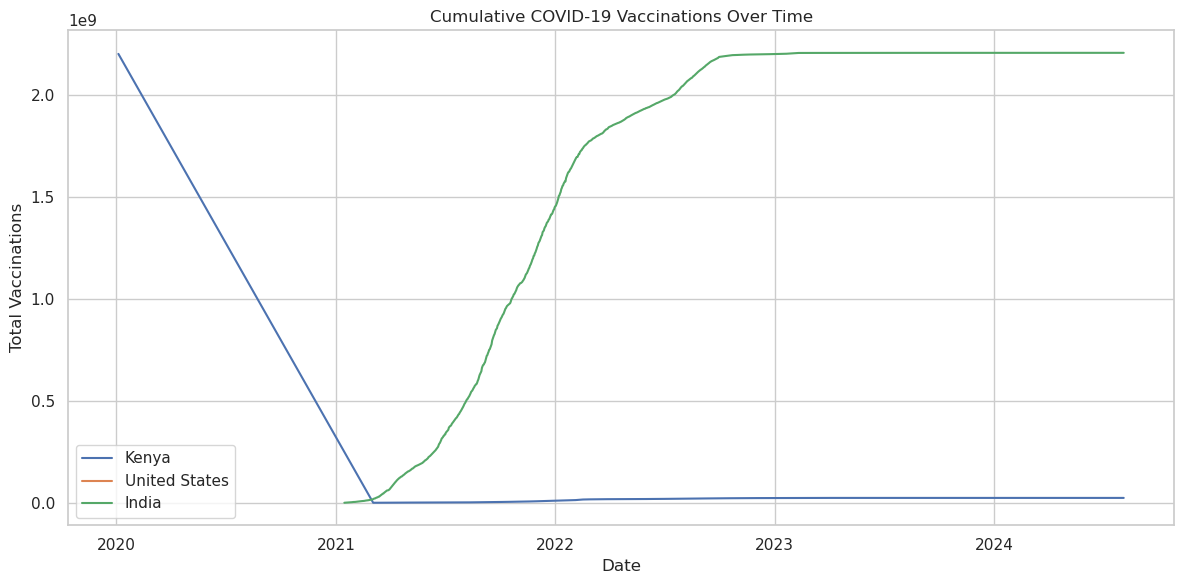

In [5]:
plt.figure(figsize=(12, 6))
for country in countries:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)

plt.title("Cumulative COVID-19 Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.tight_layout()
plt.show()


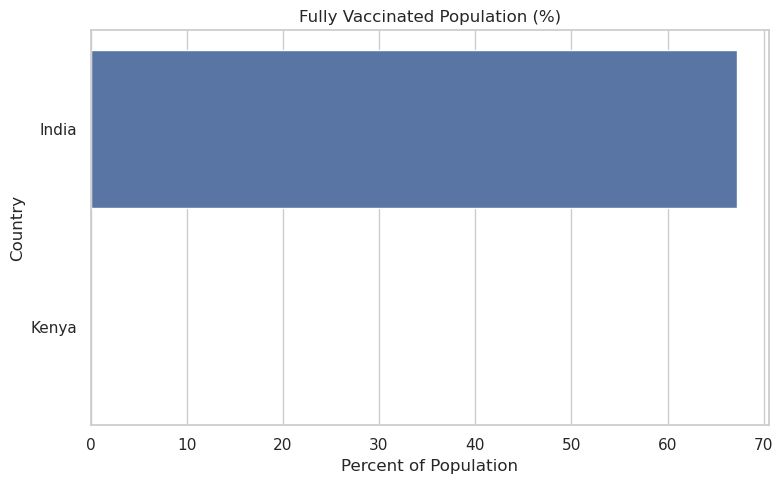

In [6]:
latest = df_filtered[df_filtered['date'] == df_filtered['date'].max()]
latest = latest[latest['location'].isin(countries)]

plt.figure(figsize=(8, 5))
sns.barplot(x='people_fully_vaccinated_per_hundred', y='location', data=latest)
plt.title("Fully Vaccinated Population (%)")
plt.xlabel("Percent of Population")
plt.ylabel("Country")
plt.tight_layout()
plt.show()
